In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [123]:
df = sns.load_dataset('titanic')

In [124]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: xlabel='sex', ylabel='age'>

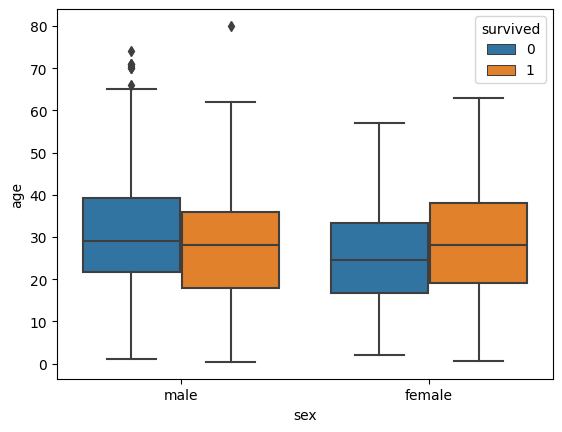

In [125]:
sns.boxplot(x='sex', y='age', hue='survived', data=df)

# Inferences from box plot
1. The median age for males who survived and did not survivr is almost same.
2. The males who survived were mostly concentrated between 20 to 40 years old.
3. The median age of the females who survived was significantly higher than those who did not survive.
4. In case of males, the range of ages of people who did not survive was higher, while in case of females, the opposite is true.
5. Outliers in the dataset are only males.
6. Males who survived had a relatively lower age than females who survived.

In [126]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [127]:
label=preprocessing.LabelEncoder()
for i in df:
    df[i]=label.fit_transform(df[i])
df.dtypes

survived       int64
pclass         int64
sex            int32
age            int64
sibsp          int64
parch          int64
fare           int64
embarked       int32
class          int32
who            int32
adult_male     int64
deck           int32
embark_town    int32
alive          int32
alone          int64
dtype: object

In [128]:
outliers=[]
def detect(df):
    threshold=0.3
    mini=np.min(df['age'])
    maxi=np.max(df['age'])
    iqr=maxi-mini
    
    low=mini+threshold*iqr
    high=maxi-threshold*iqr
    
    for i in df['age']:
        if i <= low or i > high:
            outliers.append(i)
    return outliers

In [129]:
res=detect(df)
indexval=df[(df['age'].isin(res))].index
df.drop(indexval, inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,2,1,28,1,0,18,2,2,1,1,7,2,0,0
1,1,0,0,51,1,0,207,0,0,2,0,2,0,1,0
2,1,2,0,34,0,0,41,2,2,2,0,7,2,1,1
3,1,0,0,47,1,0,189,2,0,2,0,2,2,1,0
4,0,2,1,47,0,0,43,2,2,1,1,7,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,33,0,0,12,2,2,1,1,7,2,0,1
885,0,2,0,52,0,5,151,1,2,2,0,7,1,0,0
886,0,1,1,35,0,0,85,2,1,1,1,7,2,0,1
889,1,0,1,34,0,0,153,0,0,1,1,2,0,1,1


<Axes: xlabel='sex', ylabel='age'>

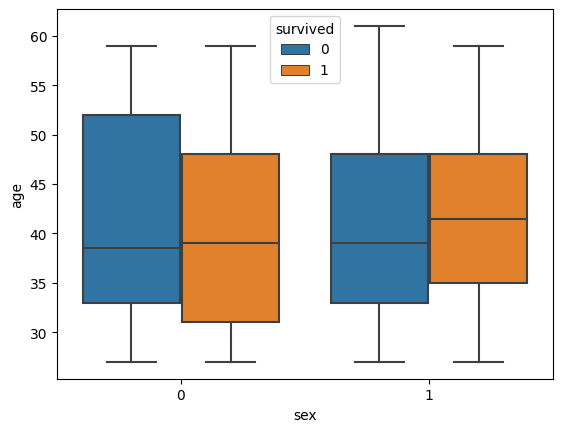

In [130]:
sns.boxplot(x='sex',y='age',hue='survived', data=df)